# Project 1: Analyzing Course Survey Data for CCM
This project aims to analyze survey data to understand key factors that influence students to enroll in computing courses at CCM. The insights derived from the data will help guide recruitment and messaging efforts.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load the cleaned 2024 dataset
data = pd.read_csv('Non-Majors Survey Results - Fall 2024.csv')
data.head()

,Timestamp,Which course are you currently enrolled in?,What motivated you to seek a computing class at CCM? [It’s a required class for the degree I’m seeking],What motivated you to seek a computing class at CCM? [To keep current in computing skills],What motivated you to seek a computing class at CCM? [Career Advancement],What motivated you to seek a computing class at CCM? [Career Change],What motivated you to seek a computing class at CCM? [Professional Development],What motivated you to seek a computing class at CCM? [Job Displacement],What motivated you to seek a computing class at CCM? [Relocation],What motivated you to seek a computing class at CCM? [IT Industry Certifications],...,"If you answered that you were interested in taking more computing classes, which ones interest you most? [CyberSecurity]","If you answered that you were interested in taking more computing classes, which ones interest you most? [App Development]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Data Analytics]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Machine Learning/Artificial Intelligence]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Computer Programming]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Game Design]","If you answered that you were interested in taking more computing classes, which ones interest you most? [Hardware Installation & Repair]",Gender,Race/ethnicity,Age
0,2024/09/10 10:47:35 AM AST,CMP 126 Computer Technology and Applications,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,No,No,No,No,No,No,Prefer not to say,Hispanic or Latino;Black/African American;Whit...,19-20
1,2024/09/10 11:00:05 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,No,Yes,Yes,No,No,...,Yes,Yes,Yes,Yes,Yes,No,No,Woman,Hispanic or Latino,19-20
2,2024/09/10 11:02:51 AM AST,CMP 126 Computer Technology and Applications,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,...,No,Yes,No,Yes,Yes,Yes,Yes,Man,Choose not to reply,18 and younger
3,2024/09/10 11:05:25 AM AST,CMP 126 Computer Technology and Applications,No,Yes,No,No,No,No,No,No,...,No,No,Yes,No,No,Yes,No,Man,Hispanic or Latino,19-20
4,2024/09/10 8:37:36 PM AST,CMP 101 Computer Information Literacy,Yes,Yes,Yes,No,Yes,No,No,No,...,No,No,No,No,No,No,No,Woman,White/Caucasian,19-20


In [5]:
# Simplify column names by removing spaces, special characters, and converting to lowercase
data.columns = [col.strip().replace(' ', '_').replace('/', '_').lower() for col in data.columns]
data.columns  # Display the updated column names to confirm changes

Index(['timestamp', 'which_course_are_you_currently_enrolled_in?',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[it’s_a_required_class_for_the_degree_i’m_seeking]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[to_keep_current_in_computing_skills]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[career_advancement]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[career_change]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[professional_development]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[job_displacement]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[relocation]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[it_industry_certifications]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[financial]',
       'what_motivated_you_to_seek_a_computing_class_at_ccm?_[personal_enrichment]',
       'what_motivated_you_to_seek_a_computing_class_at

In [6]:
# Group data by course and age, then calculate the count for each age group in each course
age_demographics = data.groupby(['which_course_are_you_currently_enrolled_in?', 'age']).size().unstack(fill_value=0)

# Display the resulting table to inspect the distribution of age demographics across different courses
age_demographics

age,18 and younger,19-20,21-24,25-34,35-64
which_course_are_you_currently_enrolled_in?,,,,,
CMP 101 Computer Information Literacy,3,8,4,3,4
CMP 126 Computer Technology and Applications,1,21,3,3,2
CMP 135 Computer Concepts with Applications,10,15,10,5,0


## Assigned Question: Compare Age Demographics Across Different Classes

This analysis examines age demographics across different computing courses to identify any significant age differences. Understanding these demographics can help inform targeted recruitment strategies.

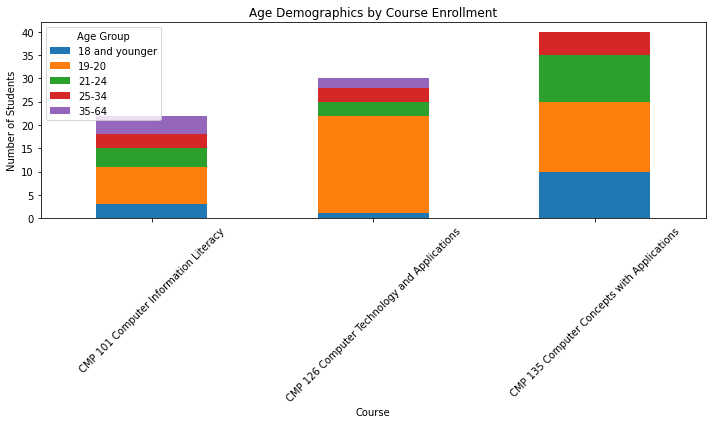

In [7]:
# Plotting the age demographics across different classes as a bar chart
age_demographics.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding chart labels and title
plt.title("Age Demographics by Course Enrollment")
plt.xlabel("Course")
plt.ylabel("Number of Students")
plt.legend(title="Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Individual Question 1: What Percentage of Students Heard About CCM Through Another Student or Faculty Member?

This analysis calculates the percentage of students who heard about CCM through a student or faculty member, which could help guide communication strategies that leverage word-of-mouth.

Percentage of students who heard about CCM through another student or faculty member: 50.00%


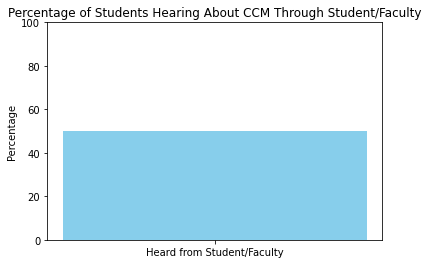

In [11]:
# Calculate the number and percentage of students who heard about CCM through "current_student" or "faculty_staff"
heard_from_student_or_faculty = data[['how_did_you_hear_about_county_college_of_morris__[current_student]',
                                      'to_what_extent_did_the_following_impact_your_decision_to_attend_county_college_of_morris?_[faculty_staff]']].apply(lambda x: x.str.lower() == 'yes')

# Total students who responded "Yes" to either column
num_students_heard_from_student_or_faculty = heard_from_student_or_faculty.any(axis=1).sum()
percentage_heard_from_student_or_faculty = (num_students_heard_from_student_or_faculty / len(data)) * 100

# Display the percentage
print(f"Percentage of students who heard about CCM through another student or faculty member: {percentage_heard_from_student_or_faculty:.2f}%")

# Bar graph to visualize the percentage
plt.bar(['Heard from Student/Faculty'], [percentage_heard_from_student_or_faculty], color='skyblue')
plt.ylabel("Percentage")
plt.title("Percentage of Students Hearing About CCM Through Student/Faculty")
plt.ylim(0, 100)
plt.show()

## Individual Question 2: What is the Top 5 Most Common Prior Educational Background or Experience Among Students Enrolled in Computing Courses?

This analysis identifies the top 5 most common educational backgrounds or experiences that students had prior to enrolling, helping to target outreach efforts based on common backgrounds.

C:\Users\jazja\AppData\Local\Temp/ipykernel_16144/508857910.py:20: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


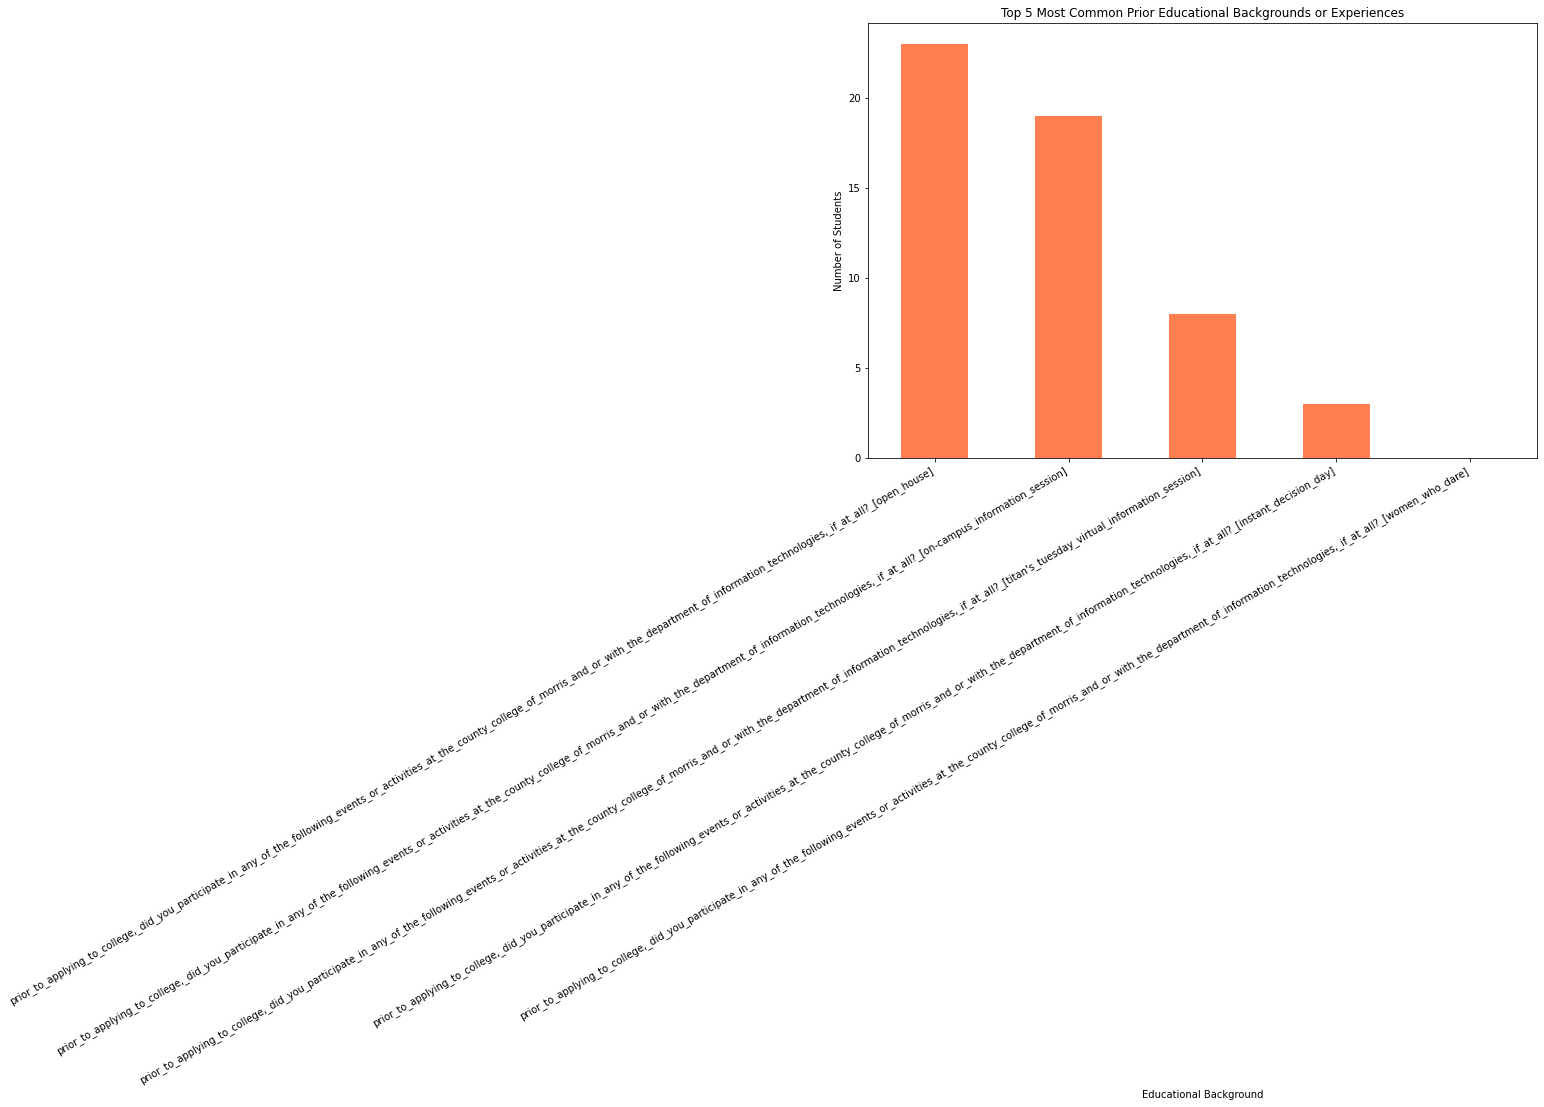

In [21]:
# Selecting columns for prior educational backgrounds or experiences
background_columns = [
    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and_or_with_the_department_of_information_technologies,_if_at_all?_[open_house]',
    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and_or_with_the_department_of_information_technologies,_if_at_all?_[instant_decision_day]',
    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and_or_with_the_department_of_information_technologies,_if_at_all?_[on-campus_information_session]',
    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and_or_with_the_department_of_information_technologies,_if_at_all?_[titan\'s_tuesday_virtual_information_session]',
    'prior_to_applying_to_college,_did_you_participate_in_any_of_the_following_events_or_activities_at_the_county_college_of_morris_and_or_with_the_department_of_information_technologies,_if_at_all?_[women_who_dare]'
]

# Count "Yes" responses
background_counts = data[background_columns].apply(lambda col: col.str.lower() == 'yes').sum().sort_values(ascending=False)
top_5_backgrounds = background_counts.head(5)

# Bar graph
top_5_backgrounds.plot(kind='bar', color='coral', figsize=(12, 8))
plt.title("Top 5 Most Common Prior Educational Backgrounds or Experiences")
plt.xlabel("Educational Background")
plt.ylabel("Number of Students")
plt.xticks(rotation=30, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()

## Individual Question 3: What Activities Were the Most Influential in Students’ Decision to Enroll in Computing Courses?

This analysis examines which activities were most influential in students' decisions to enroll, helping to identify which outreach activities to emphasize in recruitment.

C:\Users\jazja\AppData\Local\Temp/ipykernel_16144/3212786618.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


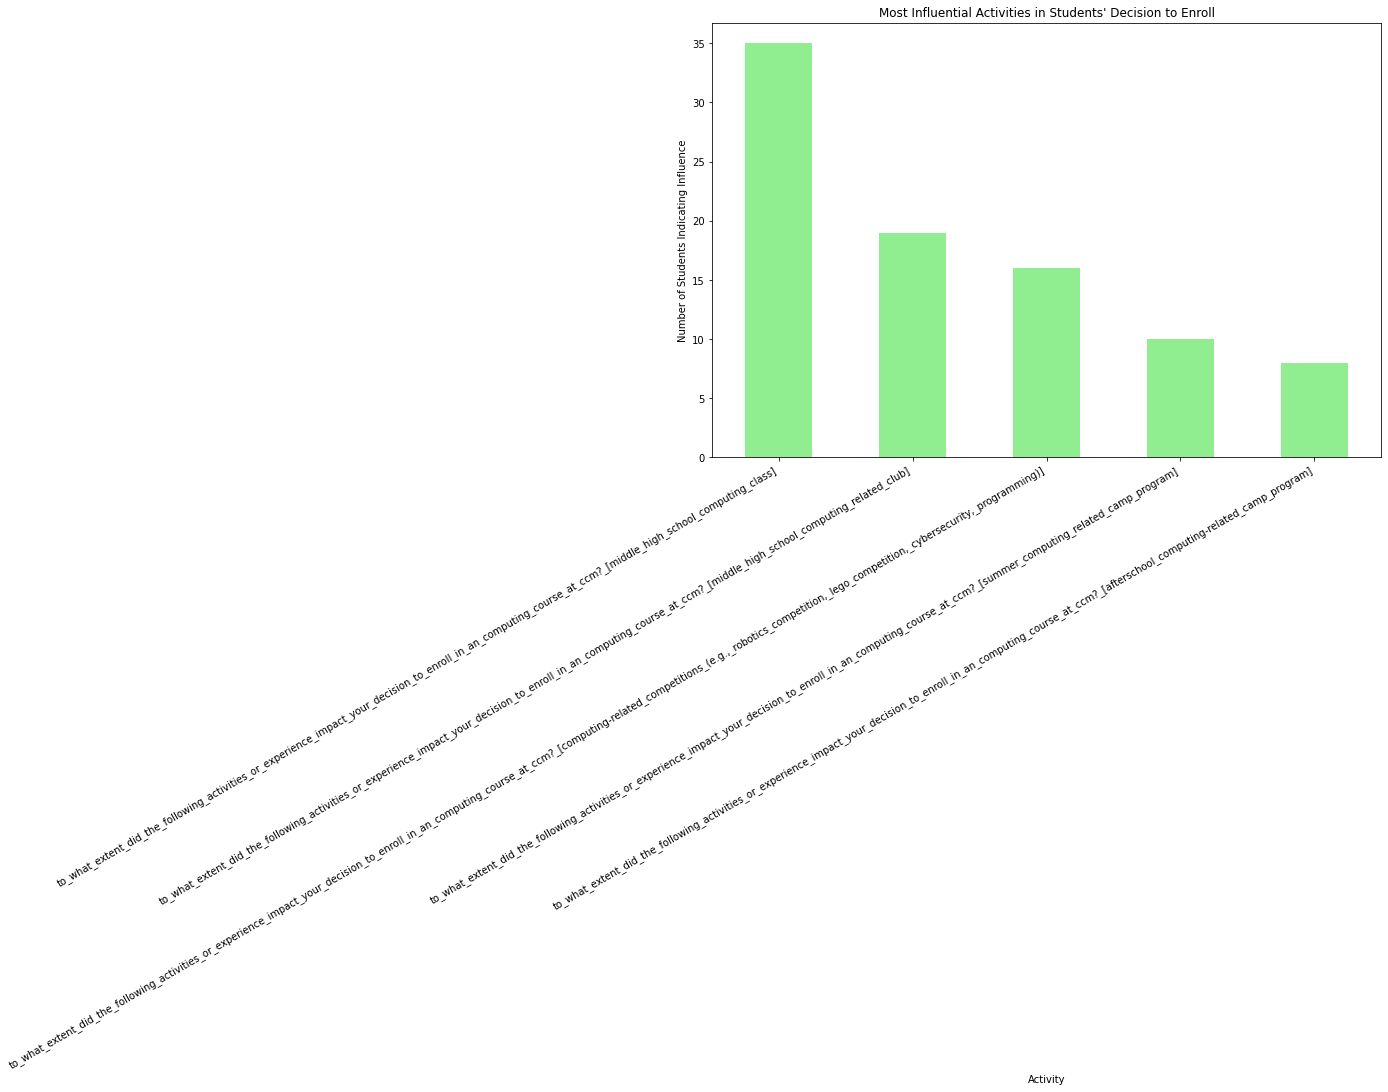

In [19]:
# Count "Some Impact" and "High Impact" responses for each activity
influential_activities_counts = data[influential_activities_columns].apply(lambda col: col.isin(['Some Impact', 'High Impact'])).sum().sort_values(ascending=False)

# Display the counts as a bar chart
# Display the counts as a bar chart with adjustments for label fitting
influential_activities_counts.plot(kind='bar', color='lightgreen', figsize=(12, 8))
plt.title("Most Influential Activities in Students' Decision to Enroll")
plt.xlabel("Activity")
plt.ylabel("Number of Students Indicating Influence")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()


## Individual Question 4: Which Communication Channels Were Most Effective in Informing Students About CCM Computing Courses?

This analysis evaluates the communication channels that were most effective in informing students about CCM computing courses. Identifying the top channels can guide resource allocation toward the most impactful sources.

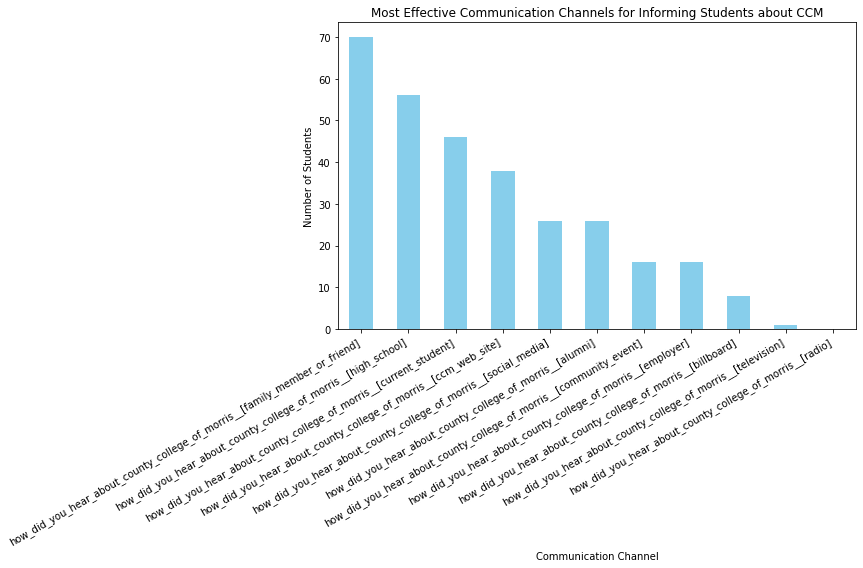

In [20]:
# Selecting relevant columns for communication channels
communication_channels_columns = [
    'how_did_you_hear_about_county_college_of_morris__[ccm_web_site]',
    'how_did_you_hear_about_county_college_of_morris__[billboard]',
    'how_did_you_hear_about_county_college_of_morris__[television]',
    'how_did_you_hear_about_county_college_of_morris__[radio]',
    'how_did_you_hear_about_county_college_of_morris__[social_media]',
    'how_did_you_hear_about_county_college_of_morris__[community_event]',
    'how_did_you_hear_about_county_college_of_morris__[family_member_or_friend]',
    'how_did_you_hear_about_county_college_of_morris__[employer]',
    'how_did_you_hear_about_county_college_of_morris__[current_student]',
    'how_did_you_hear_about_county_college_of_morris__[alumni]',
    'how_did_you_hear_about_county_college_of_morris__[high_school]'
]

# Count "Yes" responses for each channel
communication_channels_counts = data[communication_channels_columns].apply(lambda col: col.str.lower() == 'yes').sum().sort_values(ascending=False)

# Display the counts as a bar chart
communication_channels_counts.plot(kind='bar', color='skyblue', figsize=(12, 8))
plt.title("Most Effective Communication Channels for Informing Students about CCM")
plt.xlabel("Communication Channel")
plt.ylabel("Number of Students")
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()